<a id="top" style="float:right;" href="http://dynfluid.ensam.eu/"><img style="height:120px;" src="http://dynfluid.ensam.eu/uas/DYNFLUID/logoPrincipal/Logo-DynFluid-Web.png"/></a>


<center>
    <h3 style="text-align:center;color:#888888;">
        <i>--  Introduction aux méthodes LBM --</i></h3>
    <h1> TP0 - Utilisation de Sympy pour les cacluls LBM </h1>
<h3> -  - </h3>
<h4> Polynômes d'Hermite et quadrature de Gauss-Hermite </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

In [ ]:
import numpy as np
import scipy

import matplotlib
import matplotlib.pyplot as plt
import pprint
import itertools

#Option pour afficher les figures dans le notebook et eviter le plt.show():
%matplotlib inline
fs=10
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

# Pour illustrer le calcul symbolique on utilisera ici la librairie Sympy:
import sympy as sym
sym.init_printing(use_unicode=True)

<p><br/></p>
<p>
On se propose dans ce premier TP, de se familiariser avec les outils mathématiques permettant le développement des réseaux de vitesses LBM. On utilisera pour cela la librairie de calcul formel <i><a href="https://docs.sympy.org/latest/index.html">-Sympy-</a></i>
    </p>

# 1 - Les polynômes d'Hermite


## 1.1 Version Scalaire

Les polynômes d'Hermites scalaires sont définis de la façon suivante:

$$
\displaystyle{H_n(x)=(-1)^n \dfrac{1}{\omega(x)}\dfrac{d^n}{d x^n}\omega(x)}
$$

avec $\omega(x)=e^{-x^2/2}$


**En utilisant sympy, calculer les 5 premiers polynomes et leurs racines**

On pourra utiliser les fonctions:
- <a href="https://docs.sympy.org/latest/modules/core.html?highlight=sym%20diff#sympy.core.function.diff">sym.diff</a> pour la dérivation,
- <a href="https://docs.sympy.org/latest/modules/core.html?highlight=sym%20expand#sympy.core.function.expand">sym.expand</a> pour avoir les polynômes sous forme développées,
- <a href="https://docs.sympy.org/latest/modules/solvers/solvers.html"> sym.solve </a> pour les racines.

In [ ]:
# On défini les variables symboliques que l'on souhaite utiliser:
x = sym.symbols('x')
def w(x):
    return sym.exp(-x**2/2)

# On rentre l'expression:
def H(n):
    hermite=(-1)**n * 1/(w(x)) * sym.diff(w(x),x,n)
    hermite=sym.expand(hermite)
    return hermite

In [ ]:
n=2;
display(H(n))

In [ ]:
n=2
# pour avoir les racines du polynomes, données sous forme de liste
sym.solve(H(n))

**Tracer la représentation graphique sur l'interval $[-3 , 3]$**

On pourra utiliser la fonction <a href="https://docs.sympy.org/latest/modules/utilities/lambdify.html">*lambdify*</a>

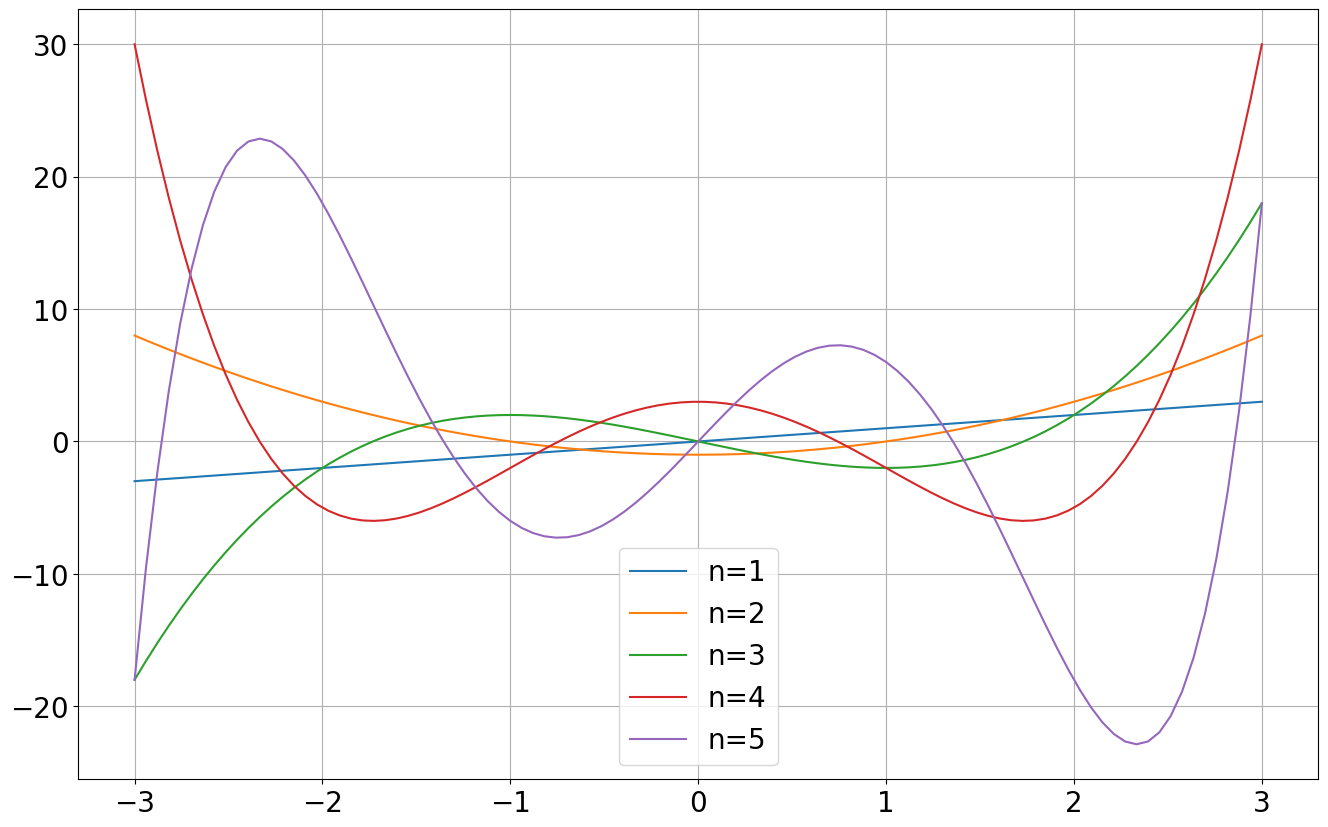

In [ ]:
xnum=np.linspace(-3,3,100)
# lambdify crée une fonction a partir du formel f(x)
plt.figure(figsize=(8,5))
for n in [1,2,3,4,5]:
    plt.plot(xnum,sym.lambdify(x,H(n))(xnum),label='n='+str(n))
    plt.grid(True)
    plt.legend(fontsize=fs)

## 1.2 Version Vectorielle

Les polynômes d'Hermites vectoriels sont définis pour le vecteur (ici 2D) $\mathbf{x}=[x,y]^T$ de la façon suivante:

$$
\displaystyle{\mathcal{H}_n(\mathbf{x})=(-1)^n \dfrac{1}{\omega(\mathbf{x})}\mathbf{\nabla}^n \omega(\mathbf{x})}
$$

avec $\omega(x)=e^{-\mathbf{x}^2/2}=e^{-(x^2+y^2)/2}$

Attention ici $\mathcal{H}_n$ est donc un tenseur de rang $n$ contenant $2^n$ éléments !

- Définir la fonction Nabla_n(i) permettant le calcul de $\mathbf{\nabla}^n \omega(\mathbf{x})$ à l'aide de la fonction *diff*
- Calculer les éléments de chaque tenseurs jusqu'à l'ordre 4

*Hint: on pourra utiliser la fonction combinations_with_replacement*

In [ ]:
x,y,z = sym.symbols('x,y,z')

def nabla_n(ind):
    X=[x,y,z]
    nabla=sym.exp(-(x**2 + y**2 + z**2)/2 )
    for i in range(len(ind)):
        nabla=sym.diff(nabla,X[ind[i]])
    return sym.simplify(nabla)

def Hv(n):
    Hout=[]
    X=[x,y,z]
    perm=list(itertools.combinations_with_replacement([0,1,2],n))
    for ind in perm:
        Hout.append(sym.simplify((-1)**n*sym.exp((x**2+y**2+z**2)/2)*nabla_n(ind)))
    return Hout

In [ ]:
Hv(0)

In [ ]:
Hv(1)

In [ ]:
Hv(2)

In [ ]:
Hv(3)

In [ ]:
Hv(4)

# 2 - Quadrature de Gauss-Hermite


Gauss hermite:

$$
\int_{-\infty}^{+\infty}\omega(\mathbf{x})P^{(N)}(\mathbf{x})d\mathbf{x}=\sum_{\alpha=1}^nw_\alpha P^{(N)}(x_\alpha)
$$

$x_\alpha ; H^{(n)}(x_\alpha)=0$

$$
w_\alpha=\dfrac{n!}{(nH^{(n-1)}(x_\alpha))^2}
$$

**Calculer les poids et les abscisses associés à l'ordre n**

In [ ]:
def fact(n):
    if n==0:
        return 1
    return n*fact(n-1)

def wi(n):
    w=[]
    for t in sym.solve(H(n)):
        w.append( fact(n)/(sym.lambdify(x,n*H(n-1))(t))**2 )
    return w

**Calculer les vitesses discrètes et leur coefficients $w_i$ pour les réseaux $D2Q4$ $D2Q9$ et $D3Q27$**

In [ ]:
print("wi(n):")
display(wi(2))
# les vitesses ont permutations
#D2Q4
print("\n résultat des vitesses pour D2Q4: \n")
n=1
q=sym.solve(H(n))
for i in itertools.product(q,repeat=2):
    print( "vecteur", i , "poids",wi(n)[i[0]]*wi(n)[i[1]] )

wi(n):



 résultat des vitesses pour D2Q4: 

vecteur (0, 0) poids 1.0


In [ ]:
...

Ellipsis

In [ ]:
...

Ellipsis

In [ ]:
...

Ellipsis

In [ ]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

FileNotFoundError: [Errno 2] No such file or directory: 'notebooks.css'

<a id="top" style="float:right;" href="http://dynfluid.ensam.eu/"><img style="height:120px;" src="http://dynfluid.ensam.eu/uas/DYNFLUID/logoPrincipal/Logo-DynFluid-Web.png"/></a>
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:120px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Logo_ENSTA_Paris.jpg"></a>
<center><a href="#top">Retour en haut de la page</a></center>